https://www.kaggle.com/datasets/surajjanathipathi/celeb-dataset-fyp 

In [7]:
!kaggle datasets download -d surajjanathipathi/celeb-dataset-fyp

Dataset URL: https://www.kaggle.com/datasets/surajjanathipathi/celeb-dataset-fyp
License(s): MIT




  0%|          | 0.00/1.89G [00:00<?, ?B/s]
  0%|          | 1.00M/1.89G [00:00<19:49, 1.71MB/s]
  0%|          | 3.00M/1.89G [00:00<06:48, 4.97MB/s]
  0%|          | 7.00M/1.89G [00:00<02:45, 12.2MB/s]
  1%|          | 11.0M/1.89G [00:00<01:53, 17.8MB/s]
  1%|          | 14.0M/1.89G [00:01<01:40, 20.1MB/s]
  1%|          | 19.0M/1.89G [00:01<01:14, 27.2MB/s]
  1%|▏         | 25.0M/1.89G [00:01<01:04, 31.2MB/s]
  1%|▏         | 29.0M/1.89G [00:01<01:03, 31.5MB/s]
  2%|▏         | 34.0M/1.89G [00:01<00:59, 33.4MB/s]
  2%|▏         | 38.0M/1.89G [00:01<01:04, 30.9MB/s]
  2%|▏         | 44.0M/1.89G [00:01<00:52, 37.6MB/s]
  3%|▎         | 49.0M/1.89G [00:02<00:54, 36.0MB/s]
  3%|▎         | 53.0M/1.89G [00:02<00:56, 34.9MB/s]
  3%|▎         | 58.0M/1.89G [00:02<00:50, 39.0MB/s]
  3%|▎         | 62.0M/1.89G [00:02<01:18, 25.0MB/s]
  3%|▎         | 66.0M/1.89G [00:02<01:15, 26.1MB/s]
  4%|▎         | 70.0M/1.89G [00:03<01:30, 21.6MB/s]
  4%|▍         | 74.0M/1.89G [00:03<01:25, 22.9MB/s]
 

In [1]:
import sklearn as sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sea

https://medium.com/@golnaz.hosseini/step-by-step-tutorial-image-classification-with-keras-7dc423f79a6b

https://www.youtube.com/watch?v=J1jhfAw5Uvo

https://keras.io/examples/vision/image_classification_from_scratch/

https://www.tensorflow.org/tutorials/images/cnn

In [53]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path

In [54]:
epochs = 20
batch_size = 32
img_height = 180
img_width = 180

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Nicolas Cage",
    image_size=(180, 180),
    batch_size=32,
    seed=123,
    shuffle=True,
)

class_names = full_ds.class_names
num_classes = len(class_names)

images, labels = [], []
for image_batch, label_batch in full_ds:
    images.append(image_batch.numpy())
    labels.append(label_batch.numpy())

images = np.concatenate(images)
labels = np.concatenate(labels)

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=123
)

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

Found 588 files belonging to 196 classes.


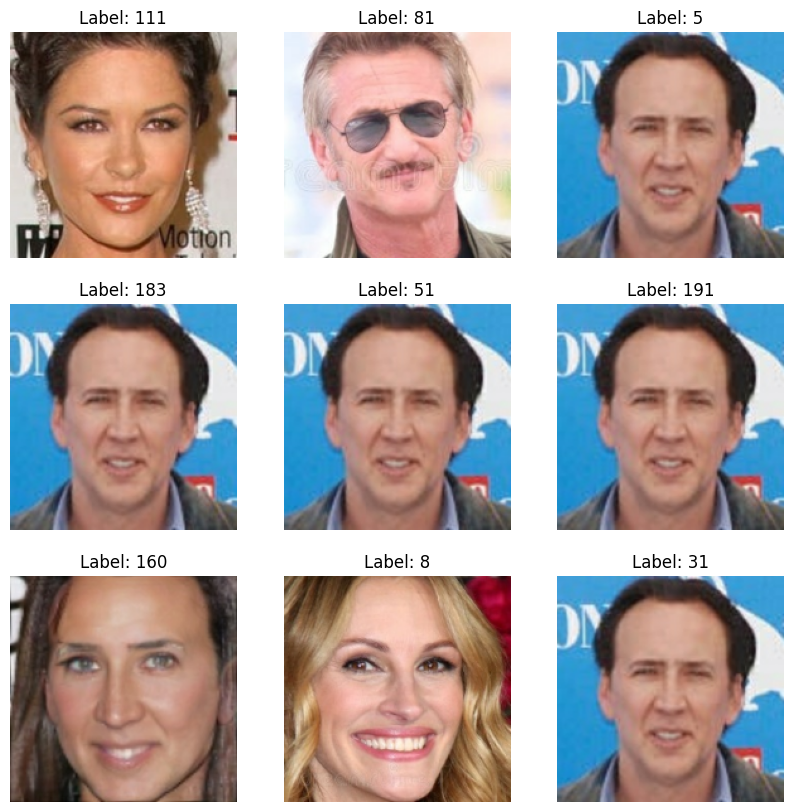

In [48]:
def plot_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    
    for images, labels in dataset.take(1): 
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8")) 
            plt.title(f'Label: {labels[i].numpy()}')  # Display the label
            plt.axis("off")

plot_images(train_ds, num_images=9)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10)


test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.6316 - loss: 2.0088 - val_accuracy: 0.4576 - val_loss: 5.1321
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.6501 - loss: 1.9390 - val_accuracy: 0.4915 - val_loss: 5.5408
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.6714 - loss: 1.7505 - val_accuracy: 0.5000 - val_loss: 6.8102
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.6783 - loss: 1.6954 - val_accuracy: 0.5000 - val_loss: 8.3604
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.6724 - loss: 1.7846 - val_accuracy: 0.4831 - val_loss: 7.1672
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.6793 - loss: 1.7119 - val_accuracy: 0.4661 - val_loss: 7.2547
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.6807 - loss: 1.6859 - val_accuracy: 0.4915 - val_loss: 8.2984
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.6818 - loss: 1.6801 - val_accuracy: 0.4915 - val_

def display(dataset):   
    class_names = ['Nicolas Cage', 'Not Cage']
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

display(train_ds)